In [112]:
# importing required libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
sales_analysis = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
sales_analysis.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [114]:
# merging the 12 months of sales data into a single csv file

files = ['./Sales_Data/Sales_January_2019.csv', './Sales_Data/Sales_February_2019.csv', './Sales_Data/Sales_March_2019.csv', './Sales_Data/Sales_April_2019.csv', 
         './Sales_Data/Sales_May_2019.csv', './Sales_Data/Sales_June_2019.csv', './Sales_Data/Sales_July_2019.csv', './Sales_Data/Sales_August_2019.csv', 
         './Sales_Data/Sales_September_2019.csv', './Sales_Data/Sales_October_2019.csv', './Sales_Data/Sales_November_2019.csv', './Sales_Data/Sales_December_2019.csv']

monthly_data = [pd.read_csv(file) for file in files]

all_data = pd.concat(monthly_data, ignore_index=True)

all_data.to_csv('merged_sales_data.csv', index=False)

In [115]:
# read in updated dataframe
all_data = pd.read_csv('merged_sales_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [116]:
# detect missing values - NaN
all_data.isnull().sum().sum()

3270

In [117]:
# drop Nan
all_data = all_data.dropna()
all_data.isnull().sum().sum()

0

In [118]:
# drop duplicated 'Or'
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [119]:
# add month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [120]:
# convert columns into numeric values (ints, floats)
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# add sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [121]:
# add a city column
def get_city(purchase_address):
    return purchase_address.split(',')[1]

def get_state(purchase_address):
    return purchase_address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ') ')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


Business Question 1: What was the best month for sales? How much was earned that month?

In [122]:
# highest number of sales based on months?
month_sales = all_data.groupby('Month').sum()['Sales']
month_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

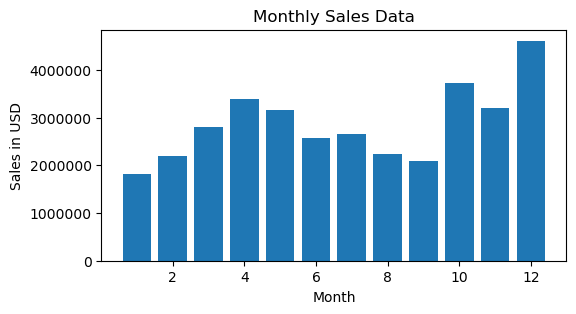

In [135]:
# visualize month/sales data
months = range(1,13)

plt.figure(figsize=(6, 3))
plt.bar(months, month_sales)
plt.title('Monthly Sales Data')
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

Business Question 1 - Answer: The peak month for sales was December, during which earnings reached $4,613,443.34.

Business Question 2: What city sold the most product?

In [124]:
# highest number of sales based on city?
city_sales = all_data.groupby('City').sum()['Sales']
city_sales

City
 Atlanta (GA)           2795498.58
 Austin (TX)            1819581.75
 Boston (MA)            3661642.01
 Dallas (TX)            2767975.40
 Los Angeles (CA)       5452570.80
 New York City (NY)     4664317.43
 Portland (ME)           449758.27
 Portland (OR)          1870732.34
 San Francisco (CA)     8262203.91
 Seattle (WA)           2747755.48
Name: Sales, dtype: float64

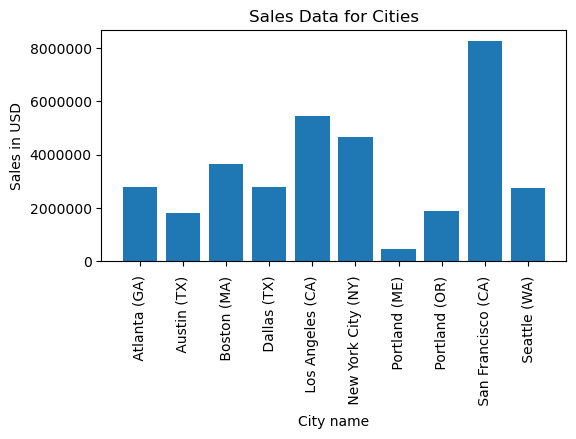

In [136]:
# visualize city/sales data
cities = [city for city, df in all_data.groupby('City')]

plt.figure(figsize=(6, 3))
plt.bar(cities, city_sales)
plt.title('Sales Data for Cities')
plt.xlabel('City name')
plt.ylabel('Sales in USD')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

Business Question 2 - Answer: San Francisco, CA, achieved the highest product sales, totaling $8,262,203.91.

Business Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [126]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

C:\Users\Benji\AppData\Local\Temp\ipykernel_75304\1435542791.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


In [127]:
# add hour columns
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11


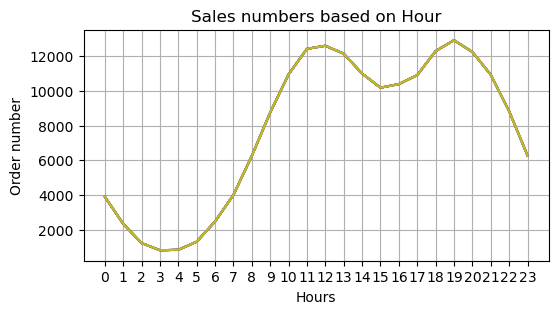

In [128]:
# visualize orders/hours data
hour = [hour for hour, df in all_data.groupby('Hour')]

plt.figure(figsize=(6, 3))
plt.plot(hour, all_data.groupby('Hour').count())
plt.xticks(hour)
plt.title('Sales numbers based on Hour')
plt.xlabel('Hours')
plt.ylabel('Order number')
plt.grid()
plt.show()


Business Question 3 - Answer: To maximize the likelihood of customers purchasing products, you should consider displaying advertisements during the hours that show peaks in sales numbers. Based on the provided graph, the two distinct peaks occur around 12 PM (noon) and 7 PM. Therefore, it would be strategic to display advertisements shortly before these times, possibly starting from 11 AM to 12 PM and then again from 6 PM to 7 PM, to capture customer attention when they are most likely to make purchases.

Business Question 4: What products are most often sold together?

In [129]:
# grouping orders based same Order ID
double_order = all_data[all_data['Order ID'].duplicated(keep=False)]

double_order['Grouped orders'] = double_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

double_order = double_order[['Order ID','Grouped orders']].drop_duplicates()

double_order.head(10)

C:\Users\Benji\AppData\Local\Temp\ipykernel_75304\3606339101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  double_order['Grouped orders'] = double_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped orders
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
228,141457,"iPhone,Apple Airpods Headphones"
250,141478,"Google Phone,Apple Airpods Headphones"
323,141550,"iPhone,Apple Airpods Headphones,Wired Headphones"
362,141587,"USB-C Charging Cable,Apple Airpods Headphones"
421,141645,"Lightning Charging Cable,Wired Headphones"


In [130]:
# counting pairs of products
from itertools import combinations
from collections import Counter

count = Counter()

for row in double_order['Grouped orders']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

Business Question 4 - Answer: The products most frequently sold together are the 'iPhone' and 'Lightning Charging Cable', which have been paired 1005 times, likely because the charging cable is a necessary accessory for the iPhone. 

Business Question 5: What product sold the most? Why do you think it sold the most?

In [131]:
# most sold product
most_sold = all_data.groupby(['Product'])['Quantity Ordered'].sum()


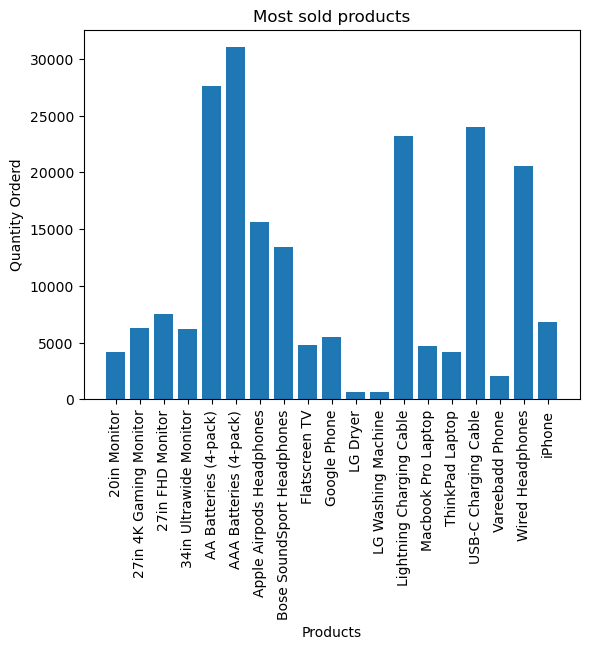

In [132]:
# visualize quantity/products data
products = [product for product, df in all_data.groupby('Product')]

plt.bar(products, most_sold)
plt.xticks(rotation=90)
plt.ylabel('Quantity Orderd')
plt.xlabel('Products')
plt.title('Most sold products')
plt.show()

C:\Users\Benji\AppData\Local\Temp\ipykernel_75304\4285855719.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation=90, size=8)


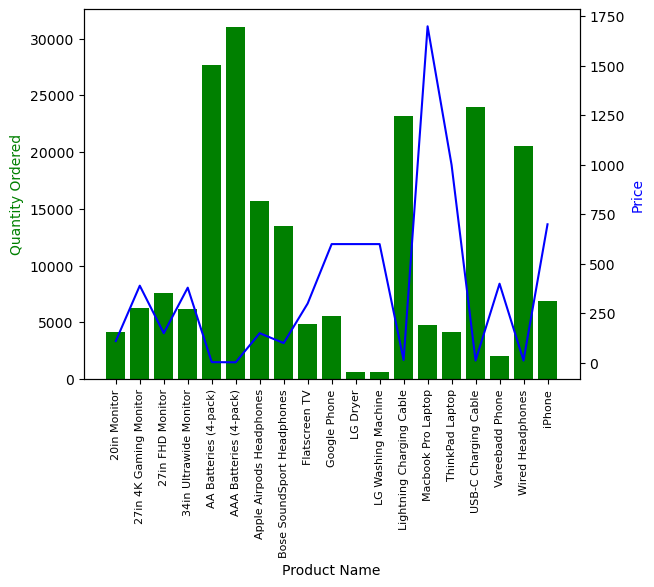

In [140]:
# visualize price of each product on quantity/products bar chart
prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, most_sold, color ='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation=90, size=8)

plt.show()

Business Question 5 - Asnwer: They might be one of the cheaper items on the list, which generally leads to higher volume in sales.The product that sold the most according to the chart is "AAA Batteries (4-pack)". They might be one of the cheaper items on the list, which generally leads to higher volume in sales.